In [1]:
from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers import Embedding, multiply, BatchNormalization, Concatenate, Input
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.layers.advanced_activations import LeakyReLU

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 145674 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.14-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.14-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
# 指定Google Drive雲端硬碟的根目錄，名為drive
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
# 請把剛剛facebook上傳檔案放於下方你要放的資料夾，如果不是下方之檔名請逕行更改
import os
os.chdir("drive/Merge_512")

In [6]:
# 開啟模型
from keras.models import load_model
generator = load_model('plan_model.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


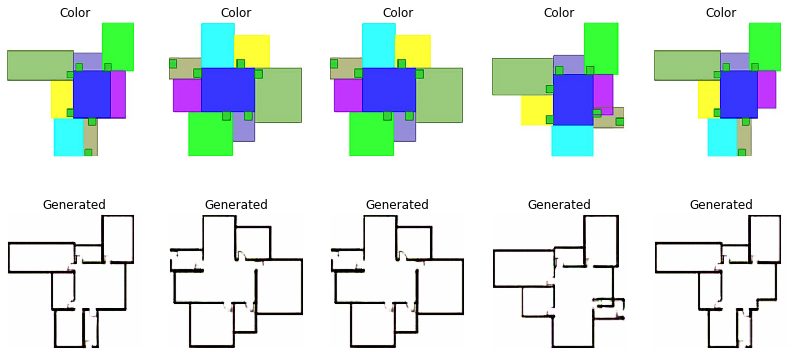

In [9]:
# 運算模型
import random
from imageio import imread
import glob
from PIL import Image

val_imglist = glob.glob('vals/*')

examples = 5
plt.figure(figsize=(14, 10))

for i in range(examples):
    idx = random.randint(0, len(val_imglist) - 1)

    testimage = Image.open(val_imglist[idx])
    testleft = testimage.crop((0, 0, int(testimage.size[0] / 2), testimage.size[1]))
    testleft = testleft.resize((256, 256))
    testleft = np.array(testleft)
    testright = testimage.crop((int(testimage.size[0] / 2), 0, 
                                testimage.size[0], testimage.size[1]))
    testright = testright.resize((256, 256))
    testright = np.array(testright)

    count = i + 1
    plt.subplot(2, examples, count)
    #plt.title('View')
    plt.axis('off')
    plt.imshow(testleft)
    plt.subplot(3, examples, count + examples)
    plt.title('Color')
    plt.axis('off')
    plt.imshow(testright)

    testright = (testright - 127.5)/127.5

    trans = generator.predict(np.array([testright]))
    trans = 0.5 * trans + 0.5
    plt.subplot(3, examples, count + 2 * examples)
    plt.title('Generated')
    plt.axis('off')
    plt.imshow(trans[0])